In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer
from sklearn.model_selection import train_test_split
from collections import defaultdict

In [92]:
data = pd.read_csv('phl_exoplanet_catalog.csv')
data[data.P_HABITABLE == 2] = 1
data

,P_NAME,P_STATUS,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,...,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,11 Com b,3.0,6165.86330,-476.74200,476.74200,NaN,NaN,NaN,2007,2014-05-14,...,0,Hot,0,0.083813,Coma Berenices,Com,Berenice's Hair,12.082709,6165.863300,1.29000
1,11 UMi b,3.0,4684.78480,-794.57001,794.57001,NaN,NaN,NaN,2009,2018-09-06,...,0,Hot,0,0.082414,Ursa Minor,UMi,Little Bear,12.229641,4684.784800,1.53000
2,14 And b,3.0,1525.57440,NaN,NaN,NaN,NaN,NaN,2008,2014-05-14,...,0,Hot,0,0.081917,Andromeda,And,Andromeda,12.848516,1525.574400,0.83000
3,14 Her b,3.0,1481.07850,-47.67420,47.67420,NaN,NaN,NaN,2002,2018-09-06,...,0,Cold,0,0.145241,Hercules,Her,Hercules,12.865261,1481.078500,2.93000
4,16 Cyg B b,3.0,565.73385,-25.42624,25.42624,NaN,NaN,NaN,1996,2018-09-06,...,1,Warm,0,0.368627,Cygnus,Cyg,Swan,13.421749,565.733850,1.66000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4043,1,1.0,1.00000,1.00000,1.00000,1.00,1.0,1.0,1,1,...,1,1,1,1.000000,1,1,1,1.000000,1.000000,1.00000
4044,K2-296 c,3.0,NaN,NaN,NaN,2.76,NaN,NaN,2019,5/23/19,...,0,Hot,0,0.363831,Virgo,Vir,Virgin,2.760000,8.047485,0.05769
4045,GJ 1061 b,3.0,1.38000,0.15000,0.16000,NaN,NaN,NaN,2019,9/3/19,...,0,Hot,0,0.588562,Horologium,Hor,Pendulum Clock,1.102775,1.380000,0.02100
4046,GJ 1061 c,3.0,1.75000,0.23000,0.23000,NaN,NaN,NaN,2019,9/3/19,...,0,Warm,1,0.879042,Horologium,Hor,Pendulum Clock,1.178333,1.750000,0.03500


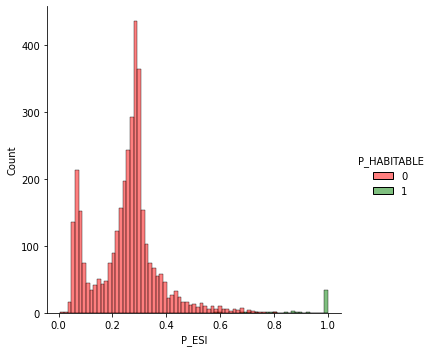

In [93]:
# ax = plt.figure(dpi=200, figsize=(10,10))
sns.displot(data=data, x='P_ESI', hue='P_HABITABLE', palette={0:'r', 1:'g'})
# plt.savefig('es')

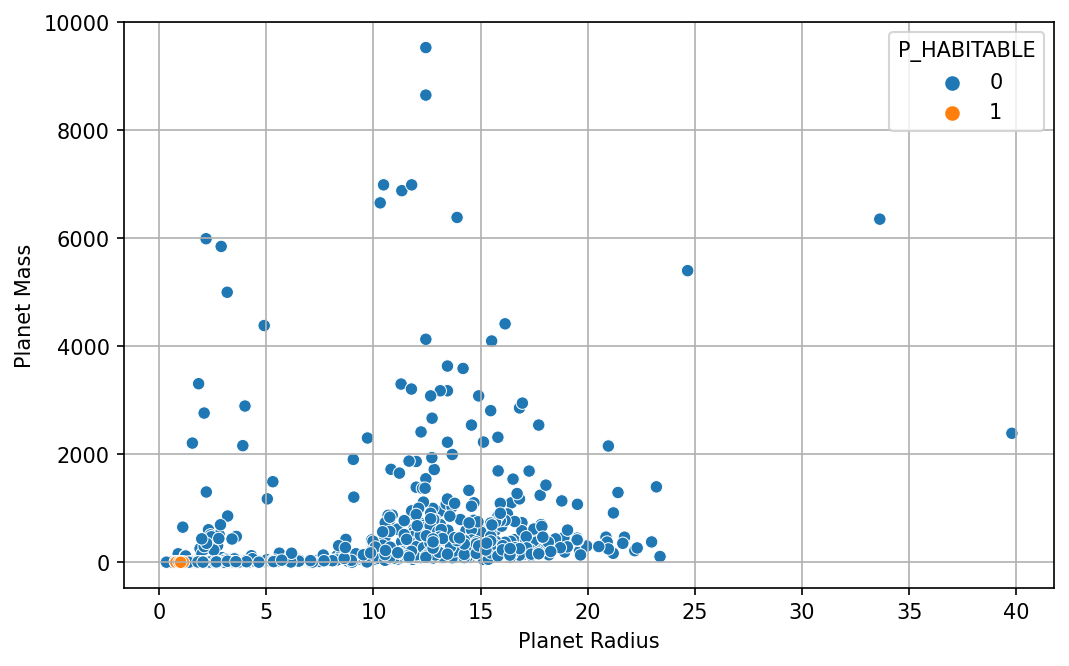

In [103]:
plt.figure(dpi=150, figsize=(8,5))
sns.scatterplot(data=data, x='P_RADIUS', y='P_MASS', hue='P_HABITABLE')
plt.xlabel('Planet Radius')
plt.ylabel('Planet Mass')
plt.grid()

In [5]:
data[["P_MASS_EST", "P_RADIUS_EST", "P_FLUX", "P_TEMP_EQUIL", "P_ESI", "S_DISTANCE", "S_MASS", "S_RADIUS"]].describe()

,P_MASS_EST,P_RADIUS_EST,P_FLUX,P_TEMP_EQUIL,P_ESI,S_DISTANCE,S_MASS,S_RADIUS
count,4048.000000,4048.000000,3.721000e+03,3721.000000,3721.000000,4042.000000,3286.000000,3725.000000
mean,323.053924,5.579450,6.166286e+02,801.873922,0.263772,628.343162,1.007401,1.540243
std,965.096241,5.399528,1.141227e+04,462.907626,0.142262,808.687207,0.651132,3.706097
min,0.000000,0.000000,1.239553e-08,1.000000,0.006768,1.000000,0.010000,0.010000
25%,3.548467,1.681500,1.191188e+01,472.076010,0.196982,150.875000,0.810000,0.800000
50%,7.815324,2.667980,7.139806e+01,740.248470,0.271192,473.535000,0.970000,0.980000
75%,149.379160,11.770500,2.983043e+02,1057.567300,0.303346,864.310000,1.130000,1.250000
max,17668.059000,77.349000,5.886344e+05,7056.775700,1.000000,8500.000000,23.560000,71.230000


In [6]:
data[["P_TYPE", "P_TYPE_TEMP","S_CONSTELLATION_ENG","S_TYPE_TEMP"]].describe()

,P_TYPE,P_TYPE_TEMP,S_CONSTELLATION_ENG,S_TYPE_TEMP
count,4031,3721,4048,3912
unique,7,4,89,8
top,Jovian,Hot,Swan,G
freq,1302,3341,1360,1787


In [7]:
data.drop(['S_RA_T', 'S_RA_H', 'S_DEC_T', 'P_HABZONE_OPT', 'P_HABZONE_CON', 'P_NAME', 'S_NAME', 'S_CONSTELLATION', 'S_TYPE', 'P_STATUS', 'P_YEAR', 'P_UPDATED', 'P_DETECTION', 'P_DETECTION_MASS', 'P_DETECTION_RADIUS', 'P_ALT_NAMES', 'S_ALT_NAMES', 'S_CONSTELLATION_ABR', 'S_CONSTELLATION_ENG', 'P_MASS_ERROR_MIN', 'P_MASS_ERROR_MAX', 'P_RADIUS_ERROR_MIN', 'P_RADIUS_ERROR_MAX', 'P_PERIOD_ERROR_MIN', 'P_PERIOD_ERROR_MAX', 'P_SEMI_MAJOR_AXIS_ERROR_MIN', 'P_SEMI_MAJOR_AXIS_ERROR_MAX', 'P_ECCENTRICITY_ERROR_MIN', 'P_ECCENTRICITY_ERROR_MAX', 'P_INCLINATION_ERROR_MIN', 'P_INCLINATION_ERROR_MAX', 'P_OMEGA_ERROR_MIN', 'P_OMEGA_ERROR_MAX', 'P_TPERI_ERROR_MIN', 'P_TPERI_ERROR_MAX', 'P_IMPACT_PARAMETER_ERROR_MIN', 'P_IMPACT_PARAMETER_ERROR_MAX', 'P_GEO_ALBEDO_ERROR_MIN', 'P_GEO_ALBEDO_ERROR_MAX', 'S_DISTANCE_ERROR_MIN', 'S_DISTANCE_ERROR_MAX', 'S_METALLICITY_ERROR_MIN', 'S_METALLICITY_ERROR_MAX', 'S_MASS_ERROR_MIN', 'S_MASS_ERROR_MAX', 'S_RADIUS_ERROR_MIN', 'S_RADIUS_ERROR_MAX', 'S_AGE_ERROR_MIN', 'S_AGE_ERROR_MAX', 'S_TEMPERATURE_ERROR_MIN', 'S_TEMPERATURE_ERROR_MAX'], axis=1, inplace=True)
data

,P_MASS,P_RADIUS,P_PERIOD,P_SEMI_MAJOR_AXIS,P_ECCENTRICITY,P_INCLINATION,P_OMEGA,P_TPERI,P_ANGULAR_DISTANCE,P_IMPACT_PARAMETER,...,S_HZ_CON1_MAX,S_SNOW_LINE,S_ABIO_ZONE,S_TIDAL_LOCK,P_TYPE_TEMP,P_HABITABLE,P_ESI,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,6165.86330,NaN,326.030000,1.29000,0.231,NaN,94.8,2452899.6,13.8,NaN,...,23.477907,34.529063,0.476460,0.642400,Hot,0,0.083813,12.082709,6165.863300,1.29000
1,4684.78480,NaN,516.219970,1.53000,0.080,NaN,NaN,NaN,12.2,NaN,...,30.323783,42.732816,0.193891,0.648683,Hot,0,0.082414,12.229641,4684.784800,1.53000
2,1525.57440,NaN,185.840000,0.83000,0.000,NaN,0.0,2452861.4,11.0,NaN,...,13.918028,20.593611,0.502752,0.600010,Hot,0,0.081917,12.848516,1525.574400,0.83000
3,1481.07850,NaN,1773.400000,2.93000,0.370,NaN,NaN,NaN,163.0,NaN,...,1.382234,2.141648,0.919756,0.445415,Cold,0,0.145241,12.865261,1481.078500,2.93000
4,565.73385,NaN,798.500000,1.66000,0.680,NaN,NaN,NaN,78.5,NaN,...,1.879164,3.019411,1.983658,0.473325,Warm,0,0.368627,13.421749,565.733850,1.66000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4043,1.00000,1.00,1.000000,1.00000,1.000,1.000,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1,1,1.000000,1.000000,1.000000,1.00000
4044,NaN,2.76,7.906961,0.05769,0.000,89.356,0.0,0.0,0.0,0.0,...,0.315153,0.430331,0.048021,NaN,Hot,0,0.363831,2.760000,8.047485,0.05769
4045,1.38000,NaN,3.204000,0.02100,0.000,NaN,145.0,0.0,0.0,0.0,...,0.084582,0.109941,0.007807,0.244044,Hot,0,0.588562,1.102775,1.380000,0.02100
4046,1.75000,NaN,6.689000,0.03500,0.000,NaN,88.0,0.0,0.0,0.0,...,0.084582,0.109941,0.007807,0.244044,Warm,1,0.879042,1.178333,1.750000,0.03500


In [8]:
data.drop(data.columns[data.apply(lambda col: col.isnull().sum() > 2000)], axis=1, inplace=True)
data

,P_RADIUS,P_PERIOD,P_SEMI_MAJOR_AXIS,P_ANGULAR_DISTANCE,S_RA,S_DEC,S_MAG,S_DISTANCE,S_METALLICITY,S_MASS,...,S_HZ_CON1_MAX,S_SNOW_LINE,S_ABIO_ZONE,S_TIDAL_LOCK,P_TYPE_TEMP,P_HABITABLE,P_ESI,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,NaN,326.030000,1.29000,13.8,185.179280,17.792868,4.740,93.37,-0.35,2.70,...,23.477907,34.529063,0.476460,0.642400,Hot,0,0.083813,12.082709,6165.863300,1.29000
1,NaN,516.219970,1.53000,12.2,229.274540,71.823898,5.016,125.72,-0.02,2.78,...,30.323783,42.732816,0.193891,0.648683,Hot,0,0.082414,12.229641,4684.784800,1.53000
2,NaN,185.840000,0.83000,11.0,352.822570,39.236198,5.227,75.59,-0.24,2.20,...,13.918028,20.593611,0.502752,0.600010,Hot,0,0.081917,12.848516,1525.574400,0.83000
3,NaN,1773.400000,2.93000,163.0,242.601300,43.817646,6.610,17.94,0.41,0.90,...,1.382234,2.141648,0.919756,0.445415,Cold,0,0.145241,12.865261,1481.078500,2.93000
4,NaN,798.500000,1.66000,78.5,295.466550,50.517525,6.250,21.15,0.06,1.08,...,1.879164,3.019411,1.983658,0.473325,Warm,0,0.368627,13.421749,565.733850,1.66000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4043,1.00,1.000000,1.00000,1.0,1.000000,1.000000,1.000,1.00,1.00,1.00,...,1.000000,1.000000,1.000000,1.000000,1,1,1.000000,1.000000,1.000000,1.00000
4044,2.76,7.906961,0.05769,0.0,179.705920,-3.389389,14.900,160.00,0.00,0.41,...,0.315153,0.430331,0.048021,NaN,Hot,0,0.363831,2.760000,8.047485,0.05769
4045,NaN,3.204000,0.02100,0.0,53.998749,-44.512703,13.060,3.69,-0.08,0.12,...,0.084582,0.109941,0.007807,0.244044,Hot,0,0.588562,1.102775,1.380000,0.02100
4046,NaN,6.689000,0.03500,0.0,53.998749,-44.512703,13.060,3.69,-0.08,0.12,...,0.084582,0.109941,0.007807,0.244044,Warm,1,0.879042,1.178333,1.750000,0.03500


In [9]:
X = data.drop(['P_HABITABLE'], axis=1)
y = data['P_HABITABLE']

In [10]:
categorical = list(X.select_dtypes(include=['object']).columns)
numerical = list(X.select_dtypes(include=['float64']).columns)
X[categorical] = X[categorical].astype('str')
X[categorical[1]].value_counts(), X[numerical].mean()

(G      1787
 K      1031
 F       721
 M       302
 nan     136
 1        34
 A        22
 B        12
 O         3
 Name: S_TYPE_TEMP, dtype: int64,
 P_RADIUS                 4.176817e+00
 P_PERIOD                 2.308305e+03
 P_SEMI_MAJOR_AXIS        6.609185e+00
 P_ANGULAR_DISTANCE       1.920900e+02
 S_RA                     2.431441e+02
 S_DEC                    2.331614e+01
 S_MAG                    1.259525e+01
 S_DISTANCE               6.283432e+02
 S_METALLICITY            2.698313e-02
 S_MASS                   1.007401e+00
 S_RADIUS                 1.540243e+00
 S_TEMPERATURE            5.451732e+03
 S_LOG_G                  4.308872e+00
 P_DISTANCE               4.052839e+00
 P_PERIASTRON             3.889975e+00
 P_APASTRON               4.143161e+00
 P_DISTANCE_EFF           4.028105e+00
 P_FLUX                   6.166286e+02
 P_FLUX_MIN               6.040864e+02
 P_FLUX_MAX               6.439564e+02
 P_TEMP_EQUIL             8.018739e+02
 P_TEMP_EQUIL_MIN         7.91

In [11]:
for col in categorical:
    X[col].fillna(data[col].mode()[0], inplace=True)

In [12]:
for col in numerical:
    X[col].fillna(data[col].mean(), inplace=True)

In [13]:
# le_dict = defaultdict(LabelEncoder)

# X[categorical] = X[categorical].apply(lambda x: le_dict[x.name].fit_transform(x))

# # # Using the dictionary to label future data
# # X_test[categorical].apply(lambda x: le_dict[x.name].transform(x))

temp = pd.get_dummies(X[categorical], columns=categorical)
X[[col for col in temp.columns]] = temp
X.drop(categorical, axis=1, inplace=True)
X

,P_RADIUS,P_PERIOD,P_SEMI_MAJOR_AXIS,P_ANGULAR_DISTANCE,S_RA,S_DEC,S_MAG,S_DISTANCE,S_METALLICITY,S_MASS,...,S_TYPE_TEMP_G,S_TYPE_TEMP_K,S_TYPE_TEMP_M,S_TYPE_TEMP_O,S_TYPE_TEMP_nan,P_TYPE_TEMP_1,P_TYPE_TEMP_Cold,P_TYPE_TEMP_Hot,P_TYPE_TEMP_Warm,P_TYPE_TEMP_nan
0,4.176817,326.030000,1.29000,13.8,185.179280,17.792868,4.740,93.37,-0.35,2.70,...,0,1,0,0,0,0,0,1,0,0
1,4.176817,516.219970,1.53000,12.2,229.274540,71.823898,5.016,125.72,-0.02,2.78,...,0,1,0,0,0,0,0,1,0,0
2,4.176817,185.840000,0.83000,11.0,352.822570,39.236198,5.227,75.59,-0.24,2.20,...,1,0,0,0,0,0,0,1,0,0
3,4.176817,1773.400000,2.93000,163.0,242.601300,43.817646,6.610,17.94,0.41,0.90,...,0,1,0,0,0,0,1,0,0,0
4,4.176817,798.500000,1.66000,78.5,295.466550,50.517525,6.250,21.15,0.06,1.08,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4043,1.000000,1.000000,1.00000,1.0,1.000000,1.000000,1.000,1.00,1.00,1.00,...,0,0,0,0,0,1,0,0,0,0
4044,2.760000,7.906961,0.05769,0.0,179.705920,-3.389389,14.900,160.00,0.00,0.41,...,0,0,1,0,0,0,0,1,0,0
4045,4.176817,3.204000,0.02100,0.0,53.998749,-44.512703,13.060,3.69,-0.08,0.12,...,0,0,1,0,0,0,0,1,0,0
4046,4.176817,6.689000,0.03500,0.0,53.998749,-44.512703,13.060,3.69,-0.08,0.12,...,0,0,1,0,0,0,0,0,1,0


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
X_train.shape, X_test.shape

((2833, 62), (1215, 62))

In [15]:
smote = SMOTETomek(sampling_strategy='auto', random_state=42, n_jobs=-1)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [16]:
y_test.value_counts()

0    1198
1      17
Name: P_HABITABLE, dtype: int64

# Training Models

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from imblearn.ensemble import BalancedBaggingClassifier, BalancedRandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

## Random Forest

In [148]:
params_rf = {
                'criterion': ('gini', 'entropy'),
                'max_depth': (2,4,8),
                'min_samples_split': (2,4,8),
                'min_samples_leaf': (1,2,4)
            }
rf = RandomForestClassifier(n_estimators=500, bootstrap=True, oob_score=True, n_jobs=-1)
rf_gcv = GridSearchCV(estimator=rf, param_grid=params_rf, n_jobs=-1, cv=5, verbose=1)
rf_gcv.fit(X_train_smote, y_train_smote)
rf_gcv.best_params_, rf_gcv.best_score_

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  2.6min finished


({'criterion': 'gini',
  'max_depth': 8,
  'min_samples_leaf': 1,
  'min_samples_split': 2},
 1.0)

In [149]:
y_pred = rf_gcv.predict(X_test)
print(classification_report(y_pred, y_test))
print(f1_score(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1198
           1       1.00      1.00      1.00        17

    accuracy                           1.00      1215
   macro avg       1.00      1.00      1.00      1215
weighted avg       1.00      1.00      1.00      1215

1.0
[[1198    0]
 [   0   17]]


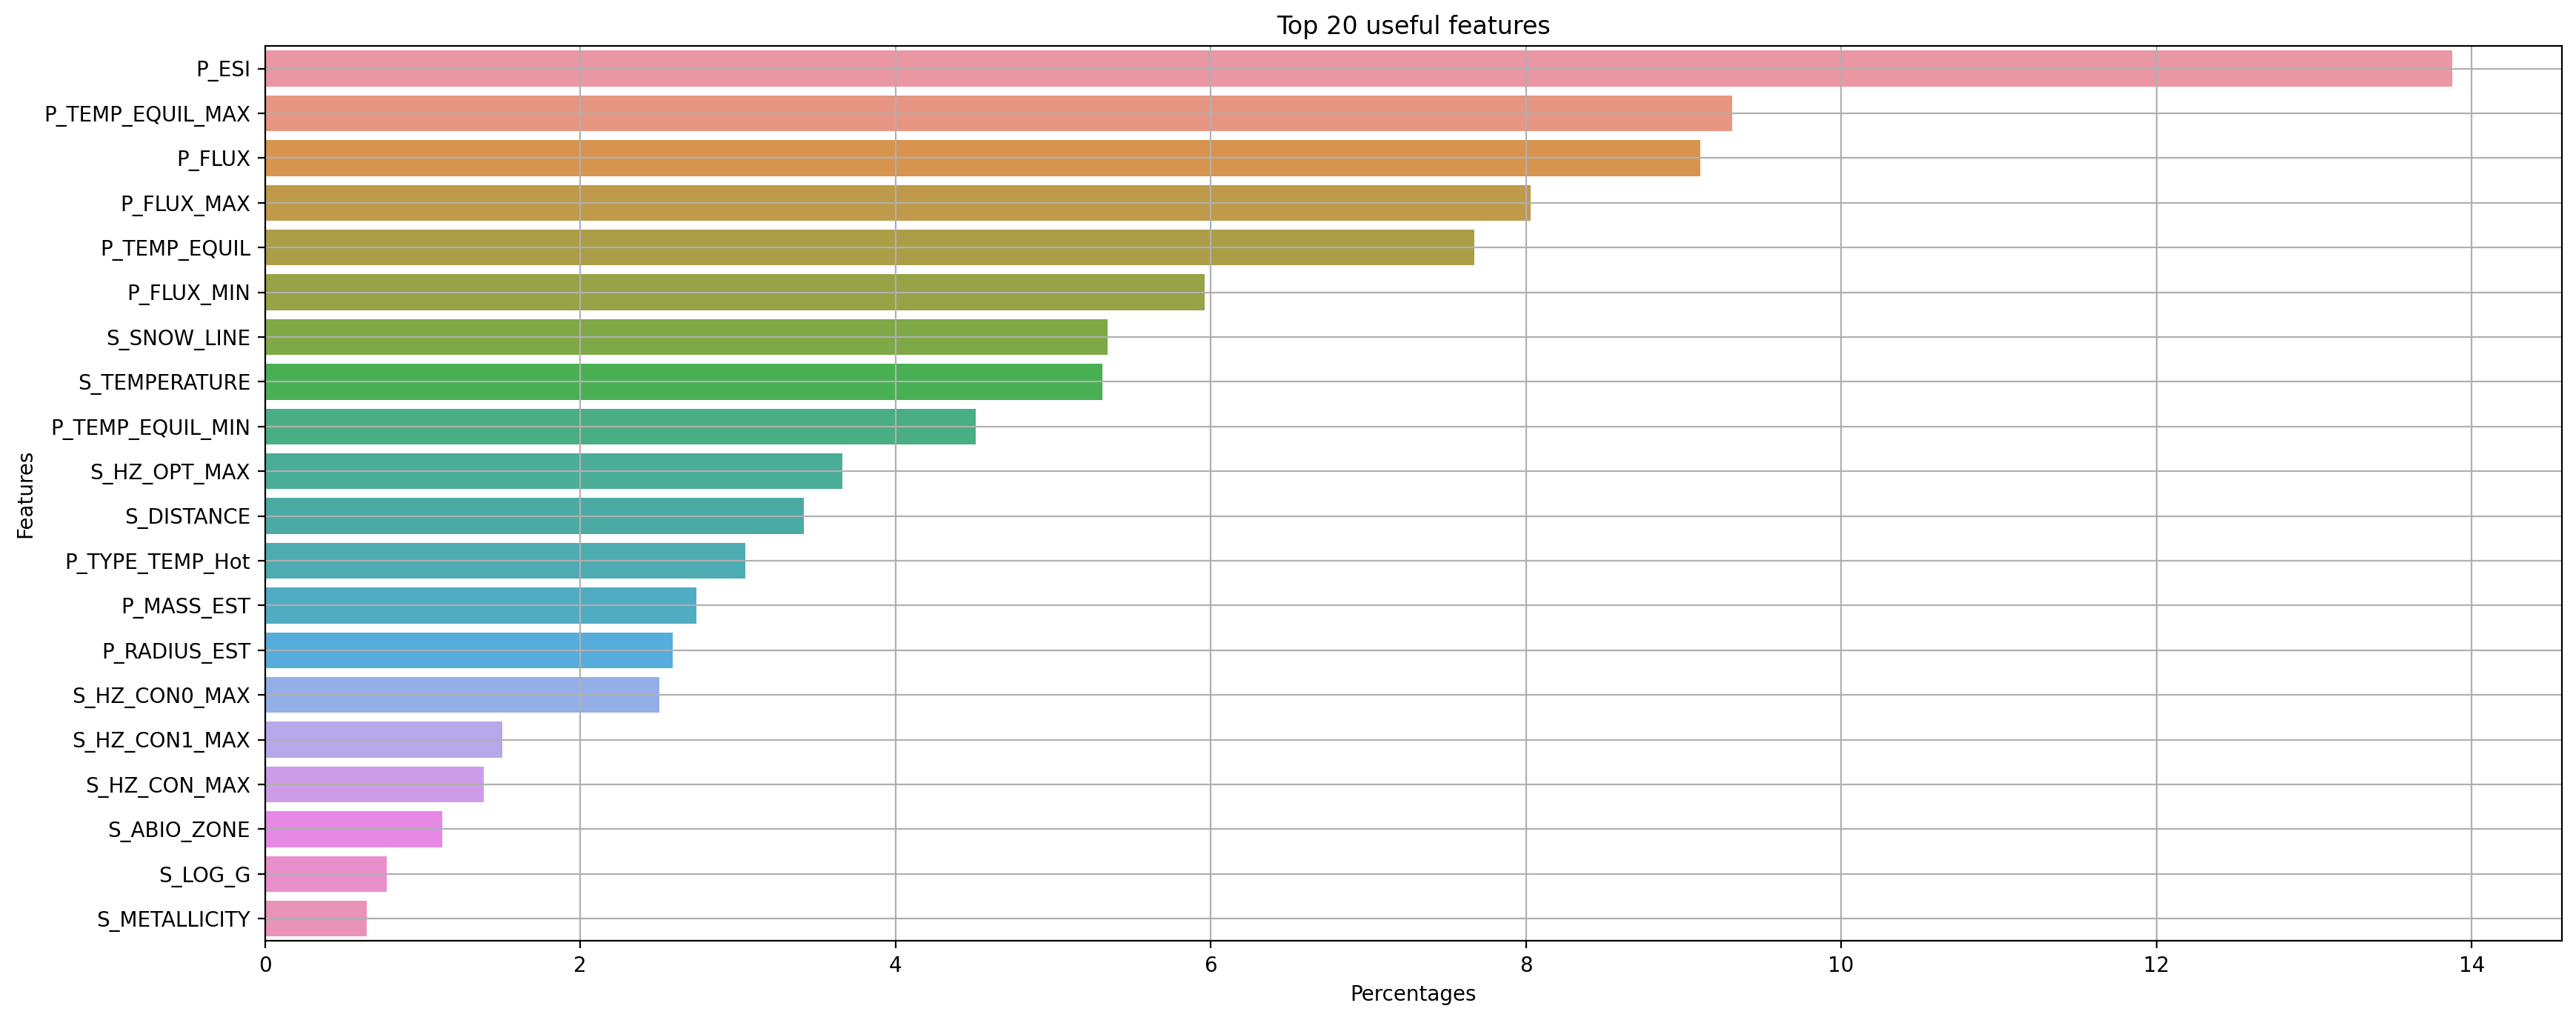

In [62]:
rf = RandomForestClassifier(n_estimators=500, bootstrap=True, oob_score=True, n_jobs=-1, criterion='gini', max_depth=8, min_samples_leaf=1, min_samples_split=2)
rf.fit(X_train_smote, y_train_smote)
imp = pd.DataFrame({'Feature':list(X_train_smote.columns),'importance':rf.feature_importances_})
imp.sort_values(['importance'], ascending=False, inplace=True)
imp = imp.iloc[:20]
plt.figure(figsize=(20, 8), dpi=200)
imp['importance'] *= 100
bar = sns.barplot(data=imp, y='Feature', x='importance', orient='h').get_figure()
plt.title('Top 20 useful features')
plt.xlabel('Percentages')
plt.ylabel('Features')
plt.grid()
plt.show()
bar.savefig('top_20_useful', dpi=300)

In [22]:
y_pred = rf.predict(X_test)
print(classification_report(y_pred, y_test))
print(f1_score(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1198
           1       1.00      1.00      1.00        17

    accuracy                           1.00      1215
   macro avg       1.00      1.00      1.00      1215
weighted avg       1.00      1.00      1.00      1215

1.0
[[1198    0]
 [   0   17]]


In [152]:
rf_bbc = BalancedRandomForestClassifier(n_estimators=500, bootstrap=True, n_jobs=-1, criterion='gini', max_depth=8, min_samples_leaf=1, min_samples_split=2)
rf_bbc.fit(X_train, y_train)
y_pred = rf_bbc.predict(X_test)
print(classification_report(y_pred, y_test))
print(f1_score(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1181
           1       1.00      0.50      0.67        34

    accuracy                           0.99      1215
   macro avg       0.99      0.75      0.83      1215
weighted avg       0.99      0.99      0.98      1215

0.6666666666666666
[[1181    0]
 [  17   17]]


## Support Vector

In [23]:
svm = SVC(C=1, gamma=0.0001, kernel='rbf')
svm.fit(X_train_smote, y_train_smote)
y_pred = svm.predict(X_test)
print(classification_report(y_pred, y_test))
print(f1_score(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1202
           1       0.76      1.00      0.87        13

    accuracy                           1.00      1215
   macro avg       0.88      1.00      0.93      1215
weighted avg       1.00      1.00      1.00      1215

0.8666666666666666
[[1198    4]
 [   0   13]]


In [214]:
params_sv = {
                'C': (0.1, 1, 10, 100),  
                'gamma': (0.001, 0.0001, 0.00001),
                'kernel': ('rbf',)
            } 
SVC
sv_gcv = GridSearchCV(estimator=SVC(), param_grid=params_sv, n_jobs=-1, cv=5, verbose=1)
sv_gcv.fit(X_train_smote, y_train_smote)
sv_gcv.best_params_, rf_gcv.best_score_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   10.5s finished


({'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}, 1.0)

In [215]:
y_pred = sv_gcv.predict(X_test)
print(classification_report(y_pred, y_test))
print(f1_score(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1202
           1       0.76      1.00      0.87        13

    accuracy                           1.00      1215
   macro avg       0.88      1.00      0.93      1215
weighted avg       1.00      1.00      1.00      1215

0.8666666666666666
[[1198    4]
 [   0   13]]


In [173]:
svm_bbc = BalancedBaggingClassifier(base_estimator=SVC(C=10, gamma=0.01, kernel='rbf'), sampling_strategy='auto', n_estimators=1000, bootstrap=True, oob_score=True, n_jobs=-1)
svm_bbc.fit(X_train, y_train)
y_pred = svm_bbc.predict(X_test)
print(classification_report(y_pred, y_test))
print(f1_score(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1206
           1       0.53      1.00      0.69         9

    accuracy                           0.99      1215
   macro avg       0.76      1.00      0.84      1215
weighted avg       1.00      0.99      0.99      1215

0.6923076923076924
[[1198    8]
 [   0    9]]


## KNN

In [84]:
knn = KNeighborsClassifier(n_neighbors=1,algorithm='auto', leaf_size=10, p=1, weights='uniform')
knn.fit(X_train_smote, y_train_smote)

KNeighborsClassifier(leaf_size=10, n_neighbors=1, p=1)

In [85]:
y_pred = knn.predict(X_test)
print(classification_report(y_pred, y_test))
print(f1_score(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1197
           1       0.94      0.89      0.91        18

    accuracy                           1.00      1215
   macro avg       0.97      0.94      0.96      1215
weighted avg       1.00      1.00      1.00      1215

0.9142857142857143
[[1196    1]
 [   2   16]]


In [156]:
params_knn = {
                'weights': ('uniform', 'distance'),
                'p': (1,2),
                'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                'leaf_size': (10,20,30,60,100)
            } 

knn_gcv = GridSearchCV(estimator=KNeighborsClassifier(n_jobs=-1, n_neighbors=1), param_grid=params_knn, n_jobs=-1, cv=5, verbose=1)
knn_gcv.fit(X_train_smote, y_train_smote)
knn_gcv.best_params_, knn_gcv.best_score_

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   17.3s finished


({'algorithm': 'auto', 'leaf_size': 10, 'p': 1, 'weights': 'uniform'},
 0.9974955277280857)

In [157]:
y_pred = knn_gcv.predict(X_test)
print(classification_report(y_pred, y_test))
print(f1_score(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1193
           1       1.00      0.77      0.87        22

    accuracy                           1.00      1215
   macro avg       1.00      0.89      0.93      1215
weighted avg       1.00      1.00      1.00      1215

0.8717948717948718
[[1193    0]
 [   5   17]]


In [161]:
knn_bbc = BalancedBaggingClassifier(base_estimator=KNeighborsClassifier(), sampling_strategy='auto', n_estimators=100, bootstrap=True, oob_score=True, n_jobs=-1)
knn_bbc.fit(X_train, y_train)
y_pred = knn_bbc.predict(X_test)
print(classification_report(y_pred, y_test))
print(f1_score(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1143
           1       1.00      0.24      0.38        72

    accuracy                           0.95      1215
   macro avg       0.98      0.62      0.68      1215
weighted avg       0.96      0.95      0.94      1215

0.38202247191011235
[[1143    0]
 [  55   17]]


## Logsitic Regression

In [74]:
params_lr = {
                'penalty': ('l1', 'l2', 'elasticnet', 'none'),
                'dual': (True, False),
                'C': (1,0.1,0.01,0.001, 0.0001),
                'solver': ('sag', 'saga')
            } 

lr_gcv = GridSearchCV(estimator=LogisticRegression(n_jobs=-1,max_iter=1000), param_grid=params_lr, n_jobs=-1, cv=5, verbose=1)
lr_gcv.fit(X_train_smote[[x for x in imp['Feature'][:2]]], y_train_smote)
lr_gcv.best_params_, lr_gcv.best_score_

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   13.7s finished
/Users/macbookpro/anaconda3/envs/sem5/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


({'C': 1, 'dual': False, 'penalty': 'l1', 'solver': 'saga'},
 0.8261180679785332)

In [75]:
y_pred = lr_gcv.predict(X_test[[x for x in imp['Feature'][:2]]])
print(classification_report(y_pred, y_test))
print(f1_score(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1203
           1       0.53      0.75      0.62        12

    accuracy                           0.99      1215
   macro avg       0.76      0.87      0.81      1215
weighted avg       0.99      0.99      0.99      1215

0.6206896551724139
[[1195    8]
 [   3    9]]


In [58]:
lr_bbc = BalancedBaggingClassifier(base_estimator=lr_gcv, sampling_strategy='auto', n_estimators=100, bootstrap=True, oob_score=True, n_jobs=-1)
lr_bbc.fit(X_train, y_train)
y_pred = lr_bbc.predict(X_test)
print(classification_report(y_pred, y_test))
print(f1_score(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1215
           1       0.00      0.00      0.00         0

    accuracy                           0.99      1215
   macro avg       0.50      0.49      0.50      1215
weighted avg       1.00      0.99      0.99      1215

0.0
[[1198   17]
 [   0    0]]


/Users/macbookpro/anaconda3/envs/sem5/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Table

In [88]:
def get_table(model):
    return pd.DataFrame(classification_report(model.predict(X_test[[x for x in imp['Feature'][:2]]]), y_test, output_dict=True)).transpose()

In [28]:
get_table(rf)

,precision,recall,f1-score,support
0,1.0,1.0,1.0,1198.0
1,1.0,1.0,1.0,17.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,1215.0
weighted avg,1.0,1.0,1.0,1215.0


In [29]:
get_table(svm)

,precision,recall,f1-score,support
0,1.000000,0.996672,0.998333,1202.000000
1,0.764706,1.000000,0.866667,13.000000
accuracy,0.996708,0.996708,0.996708,0.996708
macro avg,0.882353,0.998336,0.932500,1215.000000
weighted avg,0.997482,0.996708,0.996925,1215.000000


In [30]:
get_table(knn)

,precision,recall,f1-score,support
0,0.998331,0.999165,0.998747,1197.000000
1,0.941176,0.888889,0.914286,18.000000
accuracy,0.997531,0.997531,0.997531,0.997531
macro avg,0.969754,0.944027,0.956517,1215.000000
weighted avg,0.997484,0.997531,0.997496,1215.000000


In [89]:
get_table(lr_gcv)

,precision,recall,f1-score,support
0,0.997496,0.993350,0.995419,1203.000000
1,0.529412,0.750000,0.620690,12.000000
accuracy,0.990947,0.990947,0.990947,0.990947
macro avg,0.763454,0.871675,0.808054,1215.000000
weighted avg,0.992873,0.990947,0.991718,1215.000000
